## K-NN Implementations from Scratch

### Initialization of Utility Functions (Shuffling, Mean, Distance)

In [1]:
# Linear Congruential Generator (LCG)
# for pseudo-random numbers
def lcg(seed, a, c, m, n):
    numbers = []
    x = seed
    for _ in range(n):
        x = (a * x + c) % m
        numbers.append(x)
    return numbers

In [2]:
# Fisher-Yates Shuffle using LCG
def fisher_yates_shuffle(lst, seed=1):
    a, c, m = 1664525, 1013904223, 2**32
    n = len(lst)
    random_numbers = lcg(seed, a, c, m, n)
    for i in range(n - 1, 0, -1):
        j = random_numbers[n - 1 - i] % (i + 1)
        lst[i], lst[j] = lst[j], lst[i]
    return lst

In [3]:
def euclidean_distance(x1, x2):
    return sum((a - b)**2 for a, b in zip(x1, x2)) ** 0.5

In [4]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [5]:
def mean(lst):
    return sum(lst) / len(lst)

### Regression K-NN Initialization

In [6]:
def knn_regression(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:k]
        k_nearest_values = [y_train[i] for i in k_indices]
        y_pred.append(mean(k_nearest_values))

    return y_pred

#### Create and shuffle the training data for regression

In [7]:
X_train_regress = [[i, j] for i in range(-5, 6) for j in range(-5, 6)]
y_train_regress = [2 * i + 3 * j + (i % 2 - 0.5) * 2 for i, j in X_train_regress]

combined_regress = list(zip(X_train_regress, y_train_regress))

shuffled_combined_regress = fisher_yates_shuffle(combined_regress.copy())

X_train_regress_shuffled, y_train_regress_shuffled = zip(*shuffled_combined_regress)


### Classification K-NN Initialization

In [8]:
def knn_classification(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        y_pred.append(most_common(k_nearest_labels))

    return y_pred

#### Create and shuffle the training data for classification


In [9]:
X_train_class = [[i, j] for i in range(-5, 6) for j in range(-5, 6)] + [[i, j] for i in range(10, 16) for j in range(10, 16)]
y_train_class = [0 for _ in range(121)] + [1 for _ in range(36)]

combined_class = list(zip(X_train_class, y_train_class))

shuffled_combined_class = fisher_yates_shuffle(combined_class.copy())

X_train_class_shuffled, y_train_class_shuffled = zip(*shuffled_combined_class)

### Testing "manual" KNN Implementations

#### Classification Testing Split

In [10]:
X_test_class = [[i, i] for i in range(-50, 50, 1)]

shuffled_X_test_class = fisher_yates_shuffle(X_test_class.copy())

shuffled_y_test_class = [1 if x[0] > 5 and x[1] > 5 else 0 for x in shuffled_X_test_class]

#### Regression Testing Split

In [11]:
X_test_regress = [[i, i] for i in range(-50, 50, 1)]

shuffled_X_test_regress = fisher_yates_shuffle(X_test_regress.copy())

shuffled_y_test_regress = [2 * x[0] + 3 * x[1] + (x[0] % 2 - 0.5) * 2 for x in shuffled_X_test_regress]

#### Apply custom K-NN implementations for k=3 on newly pseudo-shuffled datasets


In [12]:
k = 3

##### Regression

In [13]:
knn_regression(X_train_regress_shuffled, y_train_regress_shuffled, shuffled_X_test_regress, k)

[23.666666666666668,
 -23.0,
 23.666666666666668,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 -23.0,
 -23.0,
 23.666666666666668,
 20.0,
 -23.0,
 -23.0,
 -23.0,
 -23.0,
 -15.333333333333334,
 -23.0,
 -23.0,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 -23.0,
 16.0,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 23.666666666666668,
 -23.0,
 -23.0,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 6.0,
 23.666666666666668,
 -23.0,
 -23.0,
 -23.0,
 23.666666666666668,
 -23.0,
 23.666666666666668,
 23.666666666666668,
 10.333333333333334,
 -5.0,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 23.666666666666668,
 -2

##### Classification

In [14]:
knn_classification(X_train_class_shuffled, y_train_class_shuffled, shuffled_X_test_class, k)

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0]

#### Apply custom implementations for multiple k values on pseudo-random data

In [15]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

##### Multiple K Regression Testing

In [16]:
regression_results_diff_k = {k: knn_regression(X_train_regress_shuffled, y_train_regress_shuffled, shuffled_X_test_regress, k) for k in k_values}


##### Multiple K Classification Testing

In [17]:
classification_results_diff_k = {k: knn_classification(X_train_class_shuffled, y_train_class_shuffled, X_test_class, k) for k in k_values}

#### Built-In (Scikit-learn) Comparison Testing

In [18]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

##### Regression Testing for Pseudo-Random Data

In [19]:
knn_regressor_pseudo = KNeighborsRegressor(n_neighbors=k)

knn_regressor_pseudo.fit(X_train_regress_shuffled, y_train_regress_shuffled)

knn_regressor_pseudo = knn_regressor_pseudo.predict(shuffled_X_test_regress)

##### Classification Testing for Pseudo-Random Data

In [20]:
# Classification for pseudo-random dataset
knn_classifier_pseudo = KNeighborsClassifier(n_neighbors=k)

knn_classifier_pseudo.fit(X_train_class_shuffled, y_train_class_shuffled)

pseudo_classification_result = knn_classifier_pseudo.predict(shuffled_X_test_class)

### Real-World Testing

In [21]:
# Importing the Diabetes dataset from scikit-learn
from sklearn.datasets import load_diabetes

#### Load the Diabetes dataset

In [22]:
diabetes_data = load_diabetes()

X_real = diabetes_data.data.tolist()  # Features
y_real = diabetes_data.target.tolist()  # Target values

#### Create training and testing sets (80/20 split)

In [23]:
k = 7

split_index = int(len(X_real) * 0.8)

X_train_real, X_test_real = X_real[:split_index], X_real[split_index:]

##### Regression Testing Labels

In [24]:
y_train_real_regress, y_test_real_regress = y_real[:split_index], y_real[split_index:]

##### Classification Testing Labels

In [25]:
# Convert the target values to binary labels for classification (based on median value)
y_real_class = [1 if y > float(sum(y_real) / len(y_real)) else 0 for y in y_real]

In [26]:
y_train_real_class, y_test_real_class = y_real_class[:split_index], y_real_class[split_index:]

#### Regression Testing for Real-World Data

In [27]:
knn_regressor_real = KNeighborsRegressor(n_neighbors=k)

knn_regressor_real.fit(X_train_real, y_train_real_regress)

real_regression_result = knn_regressor_real.predict(X_test_real)

#### Classification Testing for Real-World Data

In [28]:
# Classification for real-world dataset
knn_classifier_real = KNeighborsClassifier(n_neighbors=k)

knn_classifier_real.fit(X_train_real, y_train_real_class)

real_classification_result = knn_classifier_real.predict(X_test_real)

### "Manual" Implementations and Built-In Methods Comparison Using Multiple K Values

In [29]:
# Import metric computations for both types of KNNs (classification and regression)
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score, recall_score, roc_auc_score

In [40]:
# Initialize variables to store results
mse_builtin_pseudo = []
mse_custom_pseudo = []
mse_custom_real = []
mse_builtin_real = []

confusion_builtin_pseudo = []
confusion_custom_pseudo = []
confusion_custom_real = []
confusion_builtin_real = []

recall_custom_pseudo = []
roc_auc_custom_pseudo = []
precision_custom_pseudo = []

recall_builtin_pseudo = []
roc_auc_builtin_pseudo = []
precision_builtin_pseudo = []

recall_custom_real = []
roc_auc_custom_real = []
precision_custom_real = []

recall_builtin_real = []
roc_auc_builtin_real = []
precision_builtin_real = []

#### Evaluation Loop through Different K Values


In [41]:
for k in k_values:
    print(k)
    # Custom and Built-in K-NN on Pseudo-random dataset
    pseudo_custom_class = knn_classification(X_train_class_shuffled, y_train_class_shuffled, shuffled_X_test_class, k)
    pseudo_custom_regress = knn_regression(X_train_regress_shuffled, y_train_regress_shuffled, shuffled_X_test_regress, k)

    knn_classifier_k_pseudo = KNeighborsClassifier(n_neighbors=k)
    knn_regressor_k_pseudo = KNeighborsRegressor(n_neighbors=k)

    knn_classifier_k_pseudo.fit(X_train_class_shuffled, y_train_class_shuffled)
    knn_regressor_k_pseudo.fit(X_train_regress_shuffled, y_train_regress_shuffled)

    pseudo_builtin_class = knn_classifier_k_pseudo.predict(shuffled_X_test_class)
    pseudo_builtin_regress = knn_regressor_k_pseudo.predict(shuffled_X_test_regress)

    # Custom and Built-in K-NN on Real-world dataset
    real_custom_class = knn_classification(X_train_real, y_train_real_class, X_test_real, k)
    real_custom_regress = knn_regression(X_train_real, y_train_real_regress, X_test_real, k)

    knn_classifier_k_real = KNeighborsClassifier(n_neighbors=k)
    knn_regressor_k_real = KNeighborsRegressor(n_neighbors=k)

    knn_classifier_k_real.fit(X_train_real, y_train_real_class)
    knn_regressor_k_real.fit(X_train_real, y_train_real_regress)

    real_builtin_class = knn_classifier_k_real.predict(X_test_real)
    real_builtin_regress = knn_regressor_k_real.predict(X_test_real)

    # Calculate and store MSE for regression
    mse_builtin_pseudo.append(mean_squared_error(shuffled_y_test_regress, pseudo_builtin_regress))
    mse_custom_pseudo.append(mean_squared_error(shuffled_y_test_regress, pseudo_custom_regress))
    mse_builtin_real.append(mean_squared_error(y_test_real_regress, real_builtin_regress))
    mse_custom_real.append(mean_squared_error(y_test_real_regress, real_custom_regress))

    # Calculate and store Confusion Matrix for classification
    confusion_builtin_pseudo.append(confusion_matrix(shuffled_y_test_class, pseudo_builtin_class))
    confusion_custom_pseudo.append(confusion_matrix(shuffled_y_test_class, pseudo_custom_class))
    confusion_builtin_real.append(confusion_matrix(y_test_real_class, real_builtin_class))
    confusion_custom_real.append(confusion_matrix(y_test_real_class, real_custom_class))

    # Calculate and store additional metrics for classification
    recall_custom_pseudo.append(recall_score(shuffled_y_test_class, pseudo_custom_class))
    roc_auc_custom_pseudo.append(roc_auc_score(shuffled_y_test_class, pseudo_custom_class))
    precision_custom_pseudo.append(precision_score(shuffled_y_test_class, pseudo_custom_class))

    recall_builtin_pseudo.append(recall_score(shuffled_y_test_class, pseudo_builtin_class))
    roc_auc_builtin_pseudo.append(roc_auc_score(shuffled_y_test_class, pseudo_builtin_class))
    precision_builtin_pseudo.append(precision_score(shuffled_y_test_class, pseudo_builtin_class))

    recall_custom_real.append(recall_score(y_test_real_class, real_custom_class))
    roc_auc_custom_real.append(roc_auc_score(y_test_real_class, real_custom_class))
    precision_custom_real.append(precision_score(y_test_real_class, real_custom_class))

    recall_builtin_real.append(recall_score(y_test_real_class, real_builtin_class))
    roc_auc_builtin_real.append(roc_auc_score(y_test_real_class, real_builtin_class))
    precision_builtin_real.append(precision_score(y_test_real_class, real_builtin_class))

# Display MSE and Confusion Matrix for different k-values
print(mse_custom_real == mse_builtin_real,
    mse_custom_pseudo == mse_builtin_pseudo,
    # confusion_builtin_real, confusion_custom_real, confusion_custom_pseudo, confusion_builtin_pseudo,
)

# Verify metrics for different k-values between dataset and model-type combinations
precision_custom_real == precision_builtin_real, recall_custom_real == recall_builtin_real, roc_auc_custom_real == roc_auc_builtin_real,\
    precision_custom_pseudo == precision_builtin_pseudo, recall_custom_pseudo == recall_builtin_pseudo, roc_auc_custom_pseudo == roc_auc_builtin_pseudo,\
        precision_custom_pseudo == precision_custom_real, recall_custom_pseudo == recall_custom_real, roc_auc_custom_pseudo == roc_auc_custom_real,\
            precision_builtin_pseudo == precision_builtin_real, recall_builtin_pseudo == recall_builtin_real, roc_auc_builtin_pseudo == roc_auc_builtin_real

1
2
3
4
5
6
7
8
9
True False


(True, True, True, True, True, True, False, False, False, False, False, False)

### Visualizations

In [42]:
import matplotlib.pyplot as plt

#### Regression

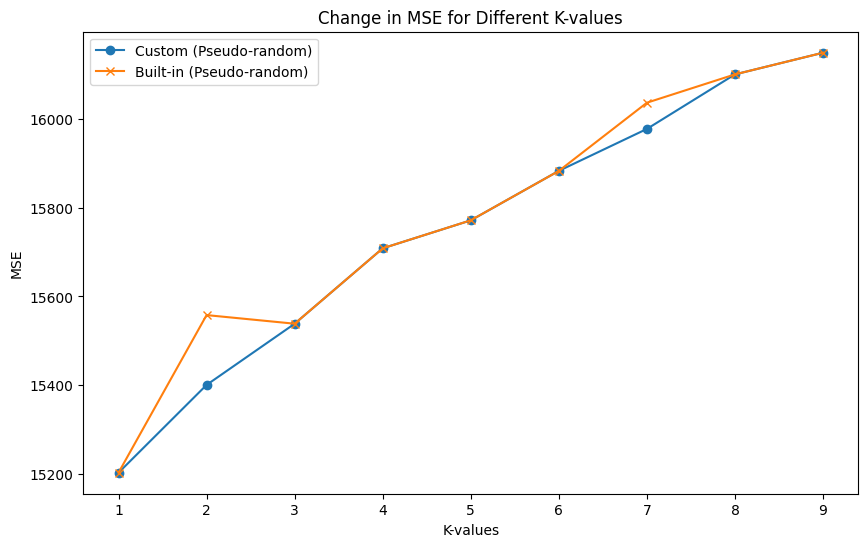

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_custom_pseudo, marker='o', label='Custom (Pseudo-random)')
plt.plot(k_values, mse_builtin_pseudo, marker='x', label='Built-in (Pseudo-random)')
plt.title('Change in MSE for Different K-values')
plt.xlabel('K-values')
plt.ylabel('MSE')
# plt.grid(True)
plt.legend()
plt.show()

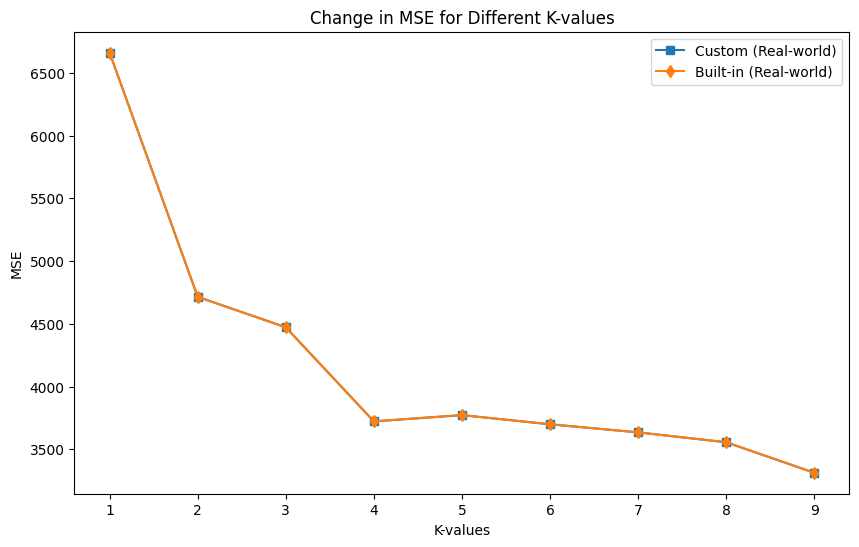

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_custom_real, marker='s', label='Custom (Real-world)')
plt.plot(k_values, mse_builtin_real, marker='d', label='Built-in (Real-world)')
plt.title('Change in MSE for Different K-values')
plt.xlabel('K-values')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Classification

In [46]:
bar_width = 0.35
index = range(len(k_values))

##### Pseudo-random Dataset

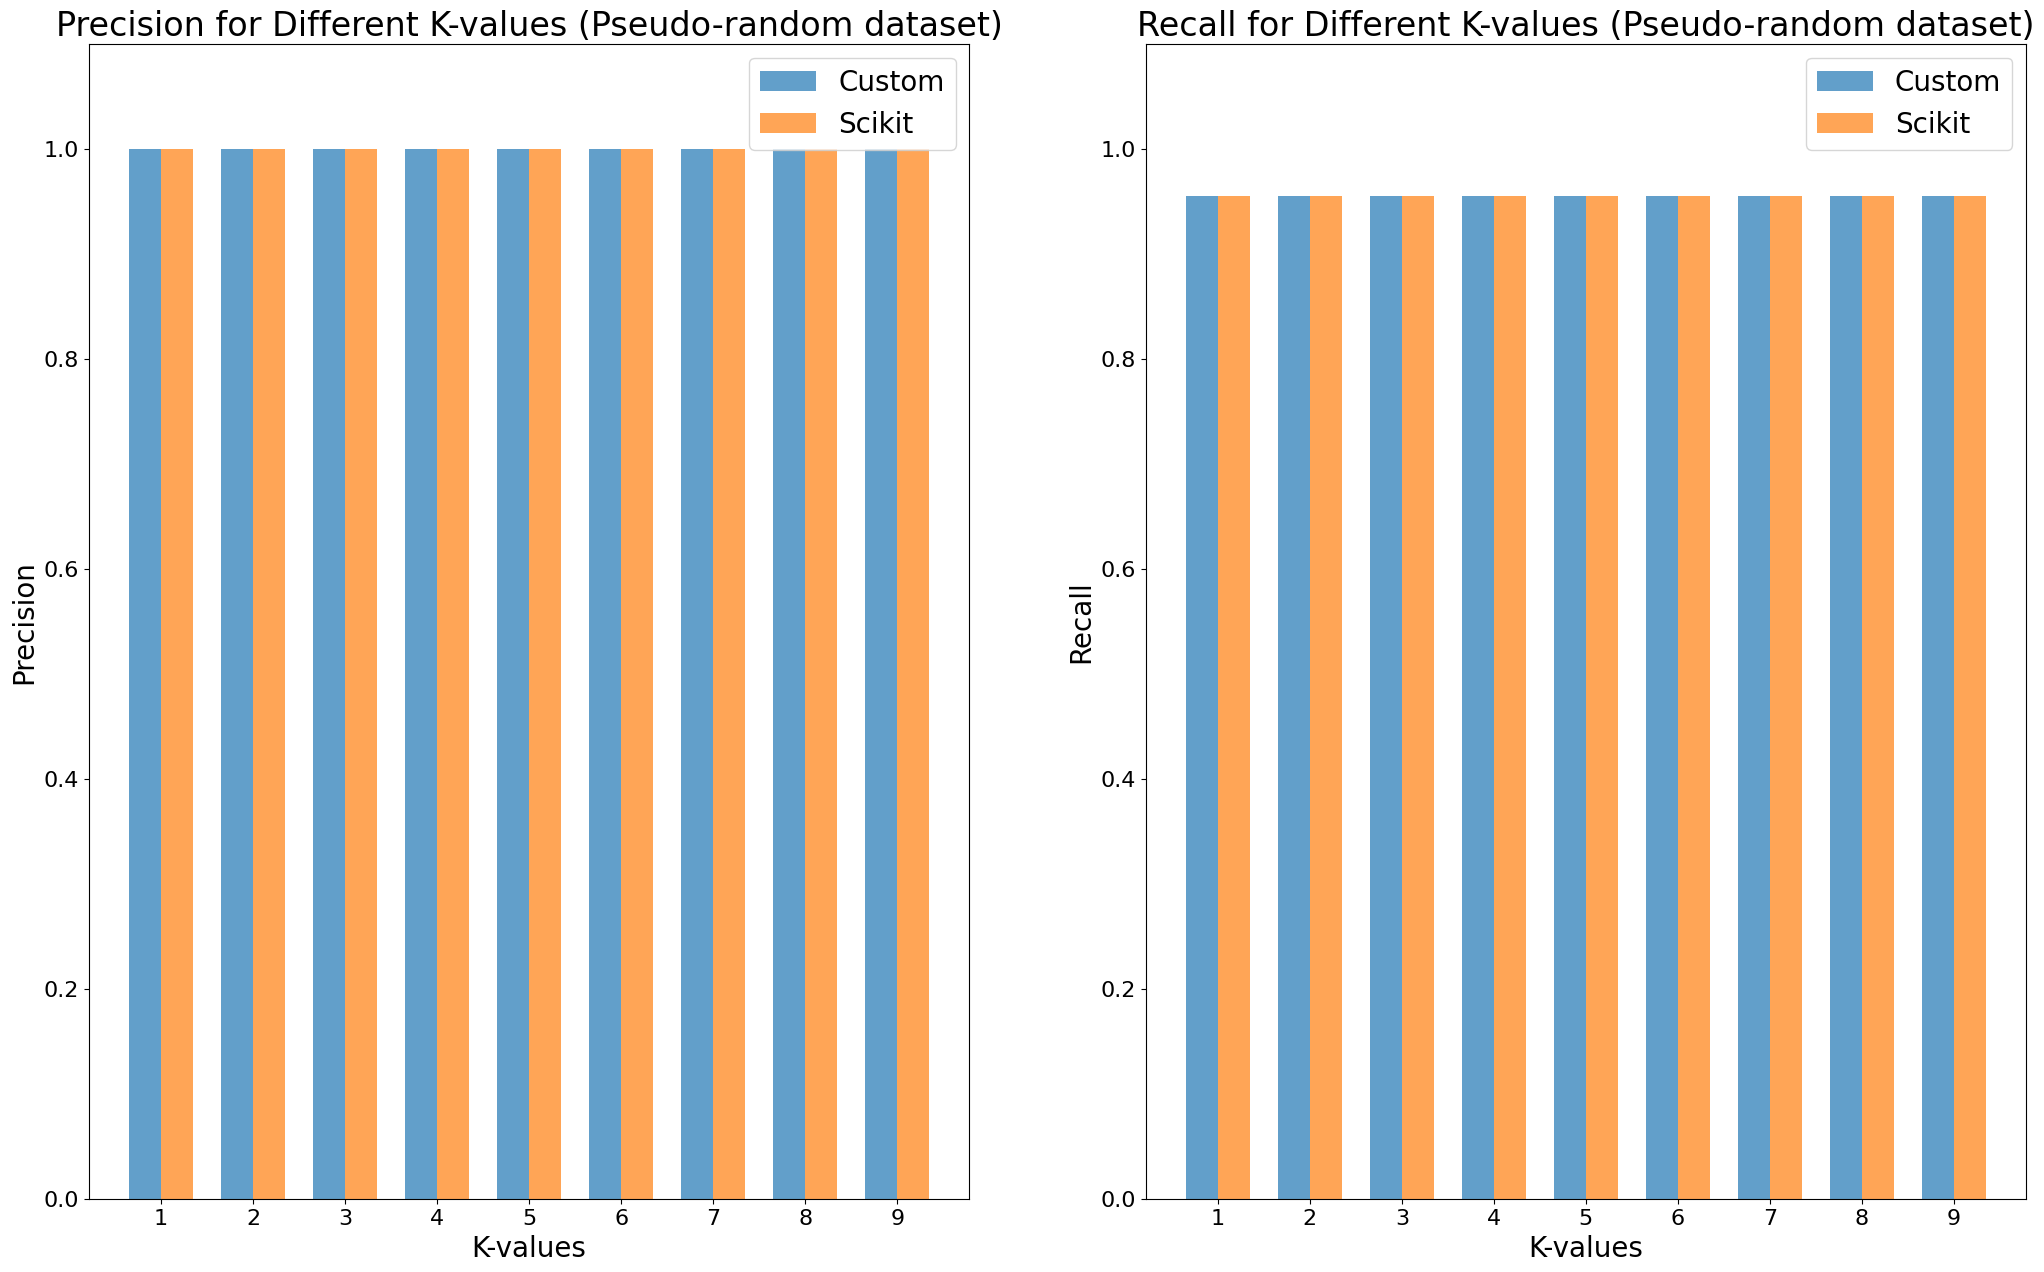

In [47]:
plt.figure(figsize=(25, 15))

plt.subplot(1, 2, 1)
plt.ylim(0, 1.1)
plt.bar(index, precision_custom_pseudo, bar_width, label='Custom', alpha=0.7)
plt.bar([i + bar_width for i in index], precision_builtin_pseudo, bar_width, label='Scikit', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], [str(k) for k in k_values], fontsize=16)
plt.title('Precision for Different K-values (Pseudo-random dataset)', fontsize=24)
plt.xlabel('K-values', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=20)

plt.subplot(1, 2, 2)
plt.ylim(0, 1.1)
plt.bar(index, recall_custom_pseudo, bar_width, label='Custom', alpha=0.7)
plt.bar([i + bar_width for i in index], recall_builtin_pseudo, bar_width, label='Scikit', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], [str(k) for k in k_values], fontsize=16)
plt.title('Recall for Different K-values (Pseudo-random dataset)', fontsize=24)
plt.xlabel('K-values', fontsize=20)
plt.ylabel('Recall', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=20)

plt.show()

##### Real-world Dataset

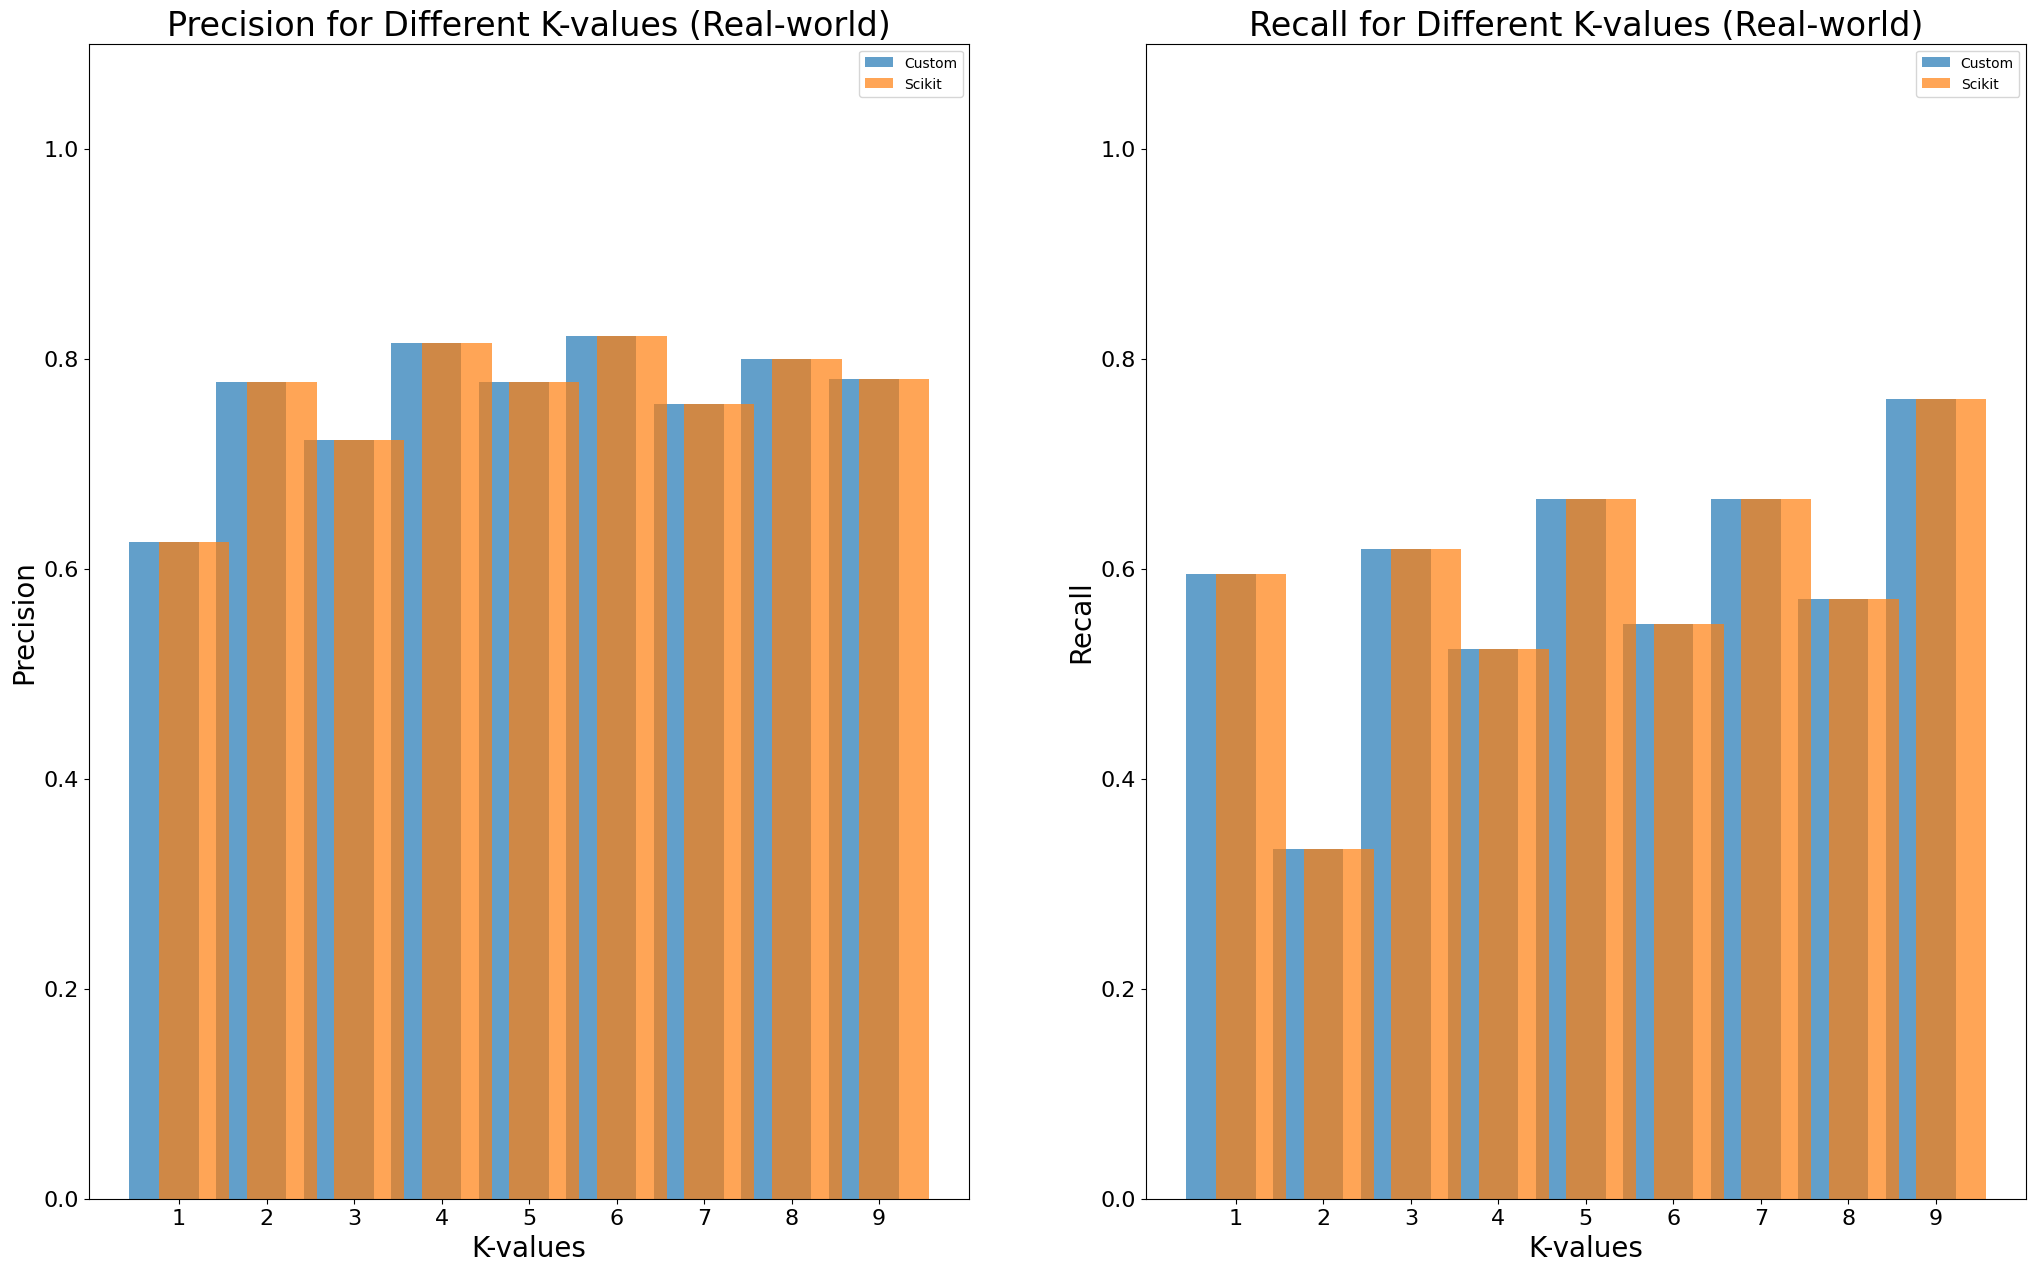

In [48]:
plt.figure(figsize=(25, 15))

plt.subplot(1, 2, 1)
plt.ylim(0, 1.1)
plt.bar(index, precision_custom_real, label='Custom', alpha=0.7)
plt.bar([i + bar_width for i in index], precision_builtin_real, label='Scikit', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], [str(k) for k in k_values], fontsize=16)
plt.title('Precision for Different K-values (Real-world)', fontsize=24)
plt.xlabel('K-values', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.ylim(0, 1.1)
plt.bar(index, recall_custom_real, label='Custom', alpha=0.7)
plt.bar([i + bar_width for i in index], recall_builtin_real, label='Scikit', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], [str(k) for k in k_values], fontsize=16)
plt.title('Recall for Different K-values (Real-world)', fontsize=24)
plt.xlabel('K-values', fontsize=20)
plt.ylabel('Recall', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend()

plt.show()


## Gradient Optimization

In [49]:
import numpy as np

In [50]:
# Function for Gradient Descent for Part (e)
def gradient_descent_e(A, y, learning_rate=0.01, iterations=1000):
    x = np.random.rand(A.shape[1])  # Initialize x randomly
    for i in range(iterations):
        # Calculate the gradient
        grad = 2 * np.dot(A.T, np.dot(A, x) - y) + 2 * x

        # Update x using gradient descent
        x = x - learning_rate * grad

        # Optional: Compute the function value to check convergence
        f_val = np.linalg.norm(np.dot(A, x) - y)**2 + np.linalg.norm(x)**2
        
    return x, f_val

# Test Gradient Descent for Part (e)
A_e = np.array([[1, 2], [3, 4], [5, 6]])
y_e = np.array([1, 2, 3])
x_e, f_val_e = gradient_descent_e(A_e, y_e)
x_e, f_val_e


(array([0.18965517, 0.34482759]), 0.17241379310344823)

In [51]:
# Modified Function for Gradient Descent for Part (c)
def gradient_descent_c(alpha, y, learning_rate=0.01, iterations=1000, epsilon=1e-8):
    x = np.random.rand(alpha.shape[0])  # Initialize x randomly
    f_val = None
    for i in range(iterations):
        dot_product = np.dot(alpha, x)
        
        # Adding safeguards for numerical stability
        dot_product = np.clip(dot_product, epsilon, 1 - epsilon)

        # Calculate the gradient
        grad = -y * alpha / dot_product + (1 - y) * alpha / (1 - dot_product)

        # Update x using gradient descent
        x = x - learning_rate * grad

        # Optional: Compute the function value to check convergence
        f_val = -y * np.log(dot_product) - (1 - y) * np.log(1 - dot_product)

    return x, f_val

# Test Gradient Descent for Part (c)
alpha_c = np.array([0.2, 0.4, 0.1])
y_c = 1
x_c, f_val_c = gradient_descent_c(alpha_c, y_c)
x_c, f_val_c

(array([3.01620805, 4.97965565, 1.37501721]), 1.0000000100247594e-08)